In [2]:
import sys
import warnings
warnings.filterwarnings("ignore")
sys.path.append("../")
from lib.stats import StatisticalTests
from lib.slices import EegSlicesChb, EegSlicesSiena, EegSlicesTusz, EegSlicesTuep
from lib.visuals import plot_eeg_windows, plot_eeg_spectrum
from lib.bss import IWasobi, EogDenoiser, CanonicalCorrelation, EmgDenoiser
from lib.signals import EegProcessorBaseClass
######### LOAD ALL THE METADATA FILES ########
slices_chb = EegSlicesChb()
slices_chb.summarize()
slices_siena = EegSlicesSiena()
slices_siena.summarize()
slices_tusz = EegSlicesTusz()
slices_tusz.summarize()
slices_tuep = EegSlicesTuep()

{
    "NULL": 161
}
{
    "IAS": 27,
    "FBTC": 9,
    "WIAS": 3
}
{
    "cpsz": 50,
    "gnsz": 97,
    "fnsz": 263,
    "tcsz": 2,
    "absz": 6,
    "tnsz": 13,
    "spsz": 1
}


### * Explore the sliced EEG - CHB

In [ ]:
PATIENT = "chb12"
SEIZURE_NUMBER = 0
PERIOD = [0, 40]

metadata, eeg_array = slices_chb.get(PATIENT, SEIZURE_NUMBER)

###########################################################
current_metadata = {}
current_metadata["seizures"] = [(0, 0, None), (metadata["seizure_start"], metadata["seizure_end"], metadata["seizure_type"])]
plot_eeg_windows(eeg_array, current_metadata, metadata["channels"], metadata["sampling_frequency"], PERIOD)

### * Explore the sliced EEG - SIENA

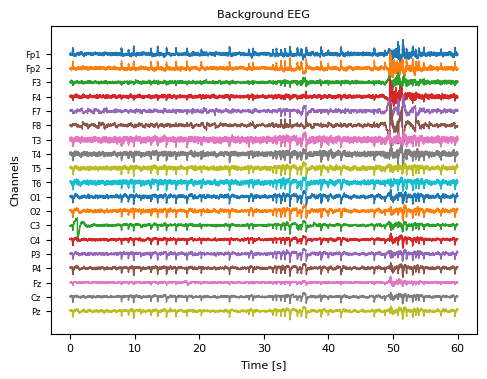

In [6]:
PATIENT = "PN00"
SEIZURE_NUMBER = 0
PERIOD = [0, 60]

metadata, eeg_array = slices_siena.get(PATIENT, SEIZURE_NUMBER)
###########################################################
current_metadata = {}
current_metadata["seizures"] = [(0, 0, None), (metadata["seizure_start"], metadata["seizure_end"], metadata["seizure_type"])]
plot_eeg_windows(eeg_array, current_metadata, metadata["channels"], metadata["sampling_frequency"], PERIOD)

### * Explore the sliced EEG - TUSZ

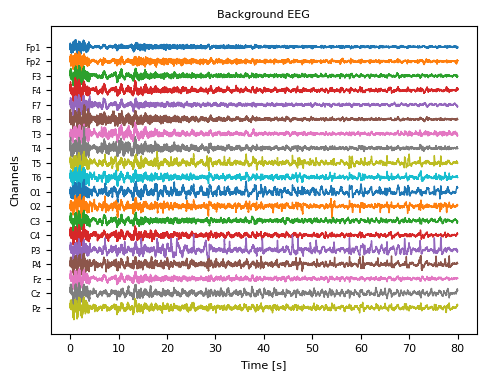

In [14]:
PATIENT = "aaaaatjz"
SEIZURE_NUMBER = 0
PERIOD = [0, 80]

metadata, eeg_array = slices_tusz.get(PATIENT, SEIZURE_NUMBER)

###########################################################
current_metadata = {}
current_metadata["seizures"] = [(0, 0, None), (metadata["seizure_start"], metadata["seizure_end"], metadata["seizure_type"])]
plot_eeg_windows(eeg_array, current_metadata, metadata["channels"], metadata["sampling_frequency"], PERIOD)

### * Explore the sliced EEG - TUEP

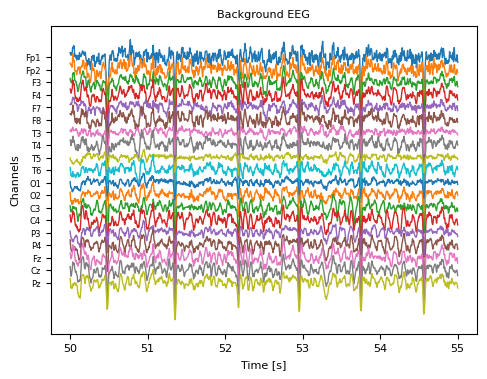

In [8]:
PATIENT = "aaaaapwy"
SLICE_NUMBER = 1
PERIOD = [50, 55]

metadata, eeg_array = slices_tuep.get(PATIENT, SLICE_NUMBER)

###########################################################
current_metadata = {}
current_metadata["seizures"] = [(0, 0, None)]
plot_eeg_windows(eeg_array, current_metadata, metadata["channels"], metadata["sampling_frequency"], PERIOD)

### Compute sources by using iWASOBI

2025-03-15 21:39:33,406 - root - INFO - Number of sources to be removed = 2, indices: [1 2]
2025-03-15 21:39:33,929 - root - INFO - Number of sources to be removed = 1, indices: [3]
2025-03-15 21:39:34,435 - root - INFO - Number of sources to be removed = 2, indices: [2 3]
2025-03-15 21:39:34,948 - root - INFO - Number of sources to be removed = 1, indices: [10]
2025-03-15 21:39:35,461 - root - INFO - Number of sources to be removed = 1, indices: [4]
2025-03-15 21:39:35,989 - root - INFO - Number of sources to be removed = 2, indices: [3 1]
2025-03-15 21:39:36,478 - root - INFO - Number of sources to be removed = 1, indices: [3]
2025-03-15 21:39:36,980 - root - INFO - Number of sources to be removed = 1, indices: [2]
2025-03-15 21:39:37,409 - root - INFO - Number of sources to be removed = 1, indices: [2]


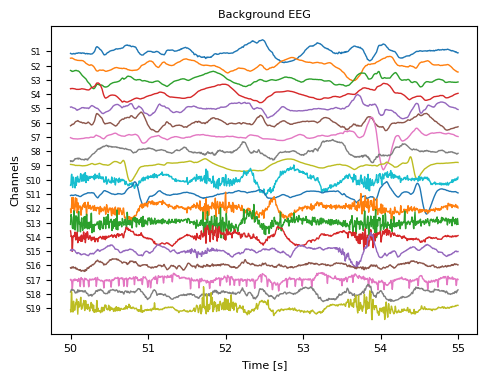

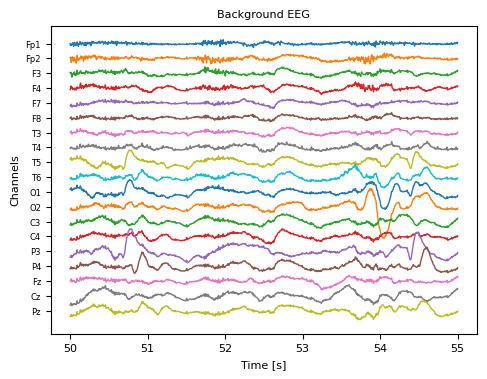

In [15]:
eog_denoiser = EogDenoiser(metadata["sampling_frequency"])
eeg_sources, clean_eog_eeg = eog_denoiser.apply_by_segments(eeg_array)

###########################################################
plot_eeg_windows(eeg_sources, current_metadata, [f"S{idx}" for idx in range(1, eeg_sources.shape[0] + 1)],
                 metadata["sampling_frequency"], period=[50, 55])

plot_eeg_windows(clean_eog_eeg, current_metadata, metadata["channels"],
                 metadata["sampling_frequency"], period=[50, 55])

### * Compute sources using BSS Canonical Correlation Analysis

2025-03-15 21:39:55,130 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,158 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,182 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,205 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,227 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,257 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,281 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,306 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,334 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,357 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,383 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,408 - root - INFO - Number of sources to be removed = 0
2025-03-15 21:39:55,431 - root - INFO - Number of sources to be removed = 0
2025-03-15 2

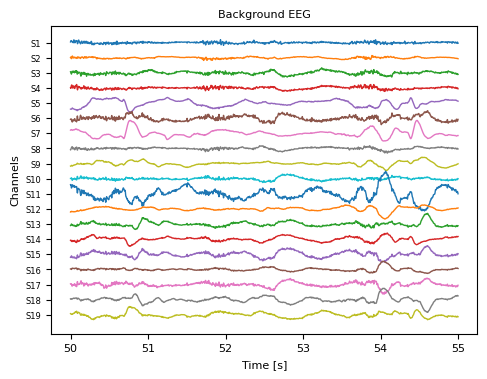

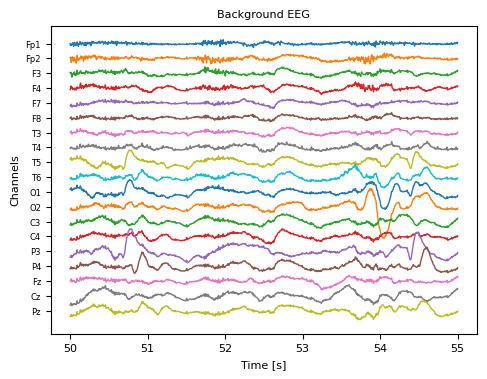

In [16]:
emg_denoiser = EmgDenoiser(metadata["sampling_frequency"])
eeg_sources, clean_emg_eeg = emg_denoiser.apply_by_segments(clean_eog_eeg)

###########################################################
plot_eeg_windows(eeg_sources, current_metadata, [f"S{idx}" for idx in range(1, eeg_sources.shape[0] + 1)],
                 metadata["sampling_frequency"], period=[50, 55])

###########################################################
plot_eeg_windows(clean_emg_eeg, current_metadata, metadata["channels"],
                 metadata["sampling_frequency"], period=[50, 55])